## mixer calibration

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from src.utils import *

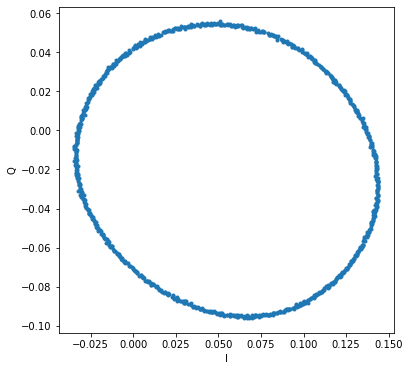

In [4]:
path = '../data/raw/mix_cal/mixer2/'
file_name = 'mix_cal_5864360'
file = path + file_name + '.h5'

import json
with open(path + 'config_' + file_name + '.json', 'r') as f:
    config = json.load(f)

#big_plot_from_file(file, config['ref'][0], config['step'])
I, Q = get_hdf5(file)
#I1, Q1, I2, Q2 = get_hdf5_2(file)
plt.figure(figsize=(6,6))
plt.scatter(I[0], Q[0], marker='.')
#plt.scatter(I2[0], Q2[0], marker='.')
plt.xlabel('I')
plt.ylabel('Q')
#plt.savefig(path + file_name + '.png', dpi=200, facecolor='white')
plt.show()

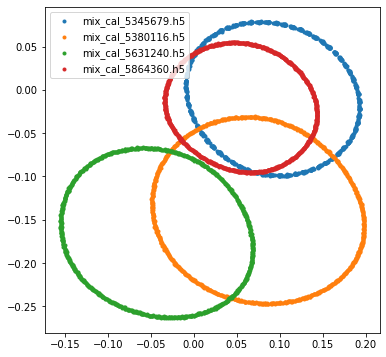

In [27]:
path = '../data/raw/mix_cal/mixer1/'
import os
files = os.listdir(path)
#file = path + file_name + '.h5'

plt.figure(figsize=(6,6))
for file in files:
    if 'config_' in file:
        pass
    else:
    #big_plot_from_file(file, config['ref'][0], config['step'])
        #I, Q = get_hdf5(file)
        I1, Q1, I2, Q2 = get_hdf5_2(path + file)
        plt.scatter(I2[0], Q2[0], marker='.', label=file)
        #plt.scatter(I2[0], Q2[0], marker='.')
plt.legend()

center: -0.017, -0.116
width: 0.112
height: 0.098
phi: 0.513


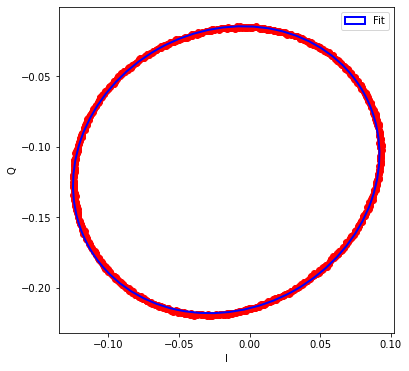

In [13]:
center, width, height, phi = ellipse_fit(I1[0], Q1[0], plot= True)
print(f'center: {center[0]:.3f}, {center[1]:.3f}')
print(f'width: {width:.3f}')
print(f'height: {height:.3f}')
print(f'phi: {phi:.3f}')

center: 0.055, -0.020
width: 0.073
height: 0.089
phi: 1.281


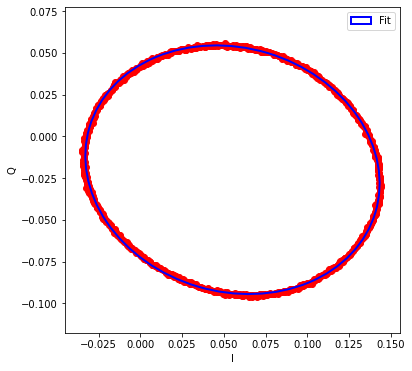

In [14]:
center, width, height, phi = ellipse_fit(I2[0], Q2[0], plot= True)
print(f'center: {center[0]:.3f}, {center[1]:.3f}')
print(f'width: {width:.3f}')
print(f'height: {height:.3f}')
print(f'phi: {phi:.3f}')

In [34]:
path = '../data/raw/mix_cal/'
import os
files = [ 'mix_cal_5345679.h5',
 'mix_cal_5380116.h5',
 'mix_cal_5631240.h5',
 'mix_cal_5864360.h5']
#file = path + file_name + '.h5'

for file in files:
    print(path + file)
    I1, Q1, I2, Q2 = get_hdf5_2(path + file)
    storage_hdf5('../data/raw/mix_cal/mixer1/'+file, 'i_signal_ch0', I1,  'q_signal_ch0', Q1)
    storage_hdf5('../data/raw/mix_cal/mixer2/'+file, 'i_signal_ch0', I2,  'q_signal_ch0', Q2)
    

../data/raw/mix_cal/mix_cal_5345679.h5
../data/raw/mix_cal/mix_cal_5380116.h5
../data/raw/mix_cal/mix_cal_5631240.h5
../data/raw/mix_cal/mix_cal_5864360.h5


## resonances visualization
4 resonances have been found so far: 4.34, 4.37, 5.63134, 5.8627
The last two are used for the acquisition

In [2]:
%load_ext autoreload
%autoreload 2

import h5py
import numpy as np
import matplotlib.pyplot as plt
from src.utils import *

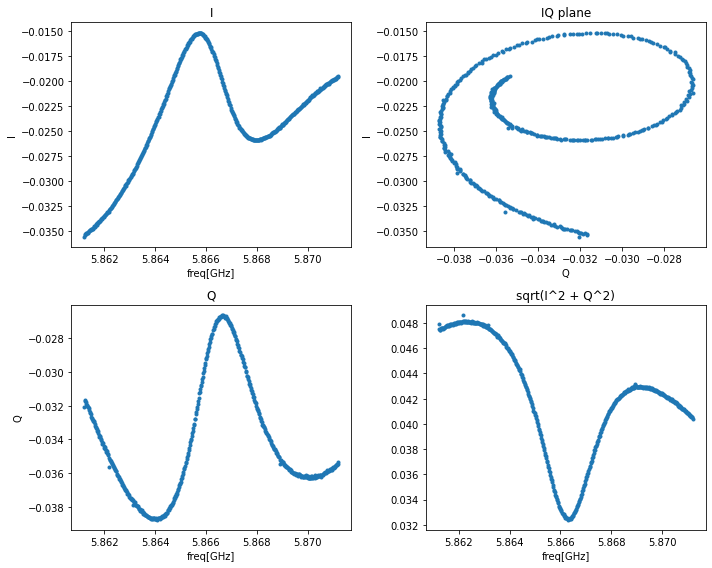

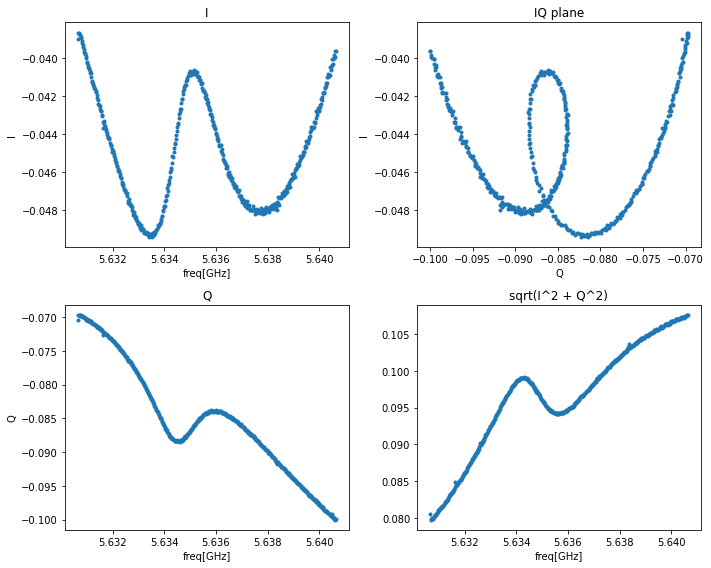

In [37]:
path = '../data/raw/cal_acq/'
file_name = 'scan_res_3'
file = path + file_name + '.h5'

import json
with open(path + 'config_' + file_name + '.json', 'r') as f:
    config = json.load(f)

#big_plot_from_file(file, config['ref'][0], config['step'])
I1, Q1, I2, Q2 = get_hdf5_2(file)
f1 = big_plot_from_array(I1, Q1, config['ref'][0], config['step'])#, begin=900, end=1500)
f2 = big_plot_from_array(I2, Q2, config['ref'][1], config['step'])#, begin=1100, end=1500)

In [31]:
f2[1100+np.argmin((np.array(Q2[1100:1500])**2+np.array(I2[1100:1500])**2)**0.5)]
#5.86622, 5.63566

5.63566

In [42]:
der_IQ(f2, I2, Q2, begin =100, end=300)

Point found during the falling at position 278 with a frequency of 5.63622.


278

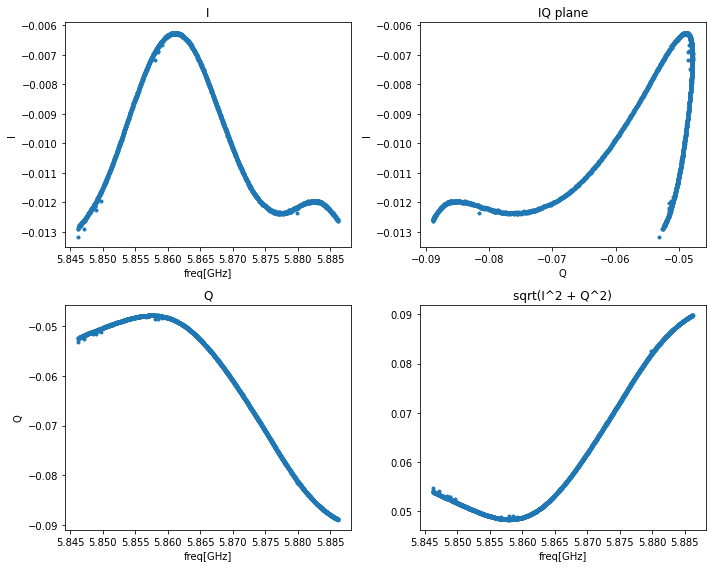

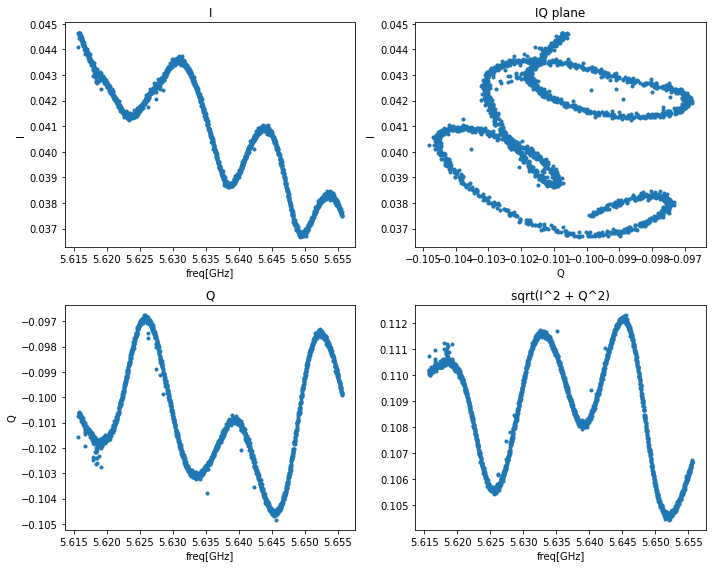

In [93]:
path = '../data/raw/cal_acq/'
file_name = 'scan_wide_off_3'
file = path + file_name + '.h5'

import json
with open(path + 'config_' + file_name + '.json', 'r') as f:
    config = json.load(f)

#big_plot_from_file(file, config['ref'][0], config['step'])
I1, Q1, I2, Q2 = get_hdf5_2(file)
f1 = big_plot_from_array(I1, Q1, config['ref'][0], config['step'])#, begin=1e4, end=2e4)
f2 = big_plot_from_array(I2, Q2, config['ref'][1], config['step'])#, begin=1000, end=1200)

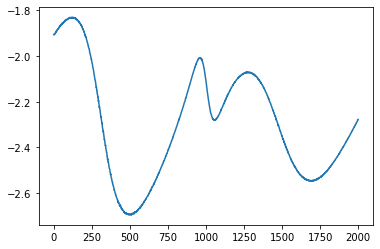

In [92]:
plt.plot(np.angle(np.array(Q1)*1j+np.array(I1)))

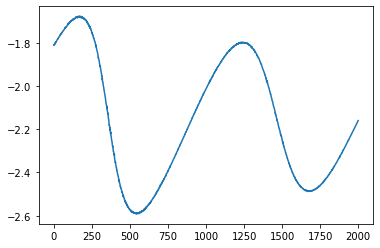

In [90]:
plt.plot(np.angle(np.array(Q1)*1j+np.array(I1)))
#plt.plot((np.array(sQ1)**2+np.array(sI1)**2)**0.5+0.005)

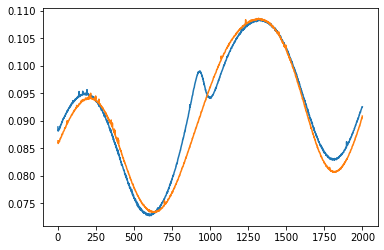

In [ ]:
plt.plot((np.array(Q2)**2+np.array(I2)**2)**0.5)
plt.plot((np.array(sQ2)**2+np.array(sI2)**2)**0.5+0.003)

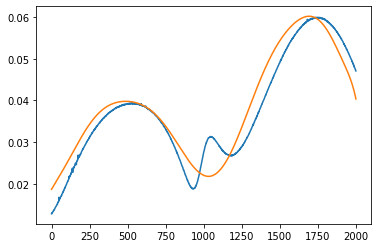

In [78]:
path = 'C:/Users/kid/Documents/QTLab2122/SingleIRsource/'
amp = np.loadtxt(path + 'amp.txt')
fit = np.loadtxt(path + 'fit.txt')
plt.plot(amp)
plt.plot(fit+0.003)

Point found during the falling at position 268 with a frequency of 5.86482.


268

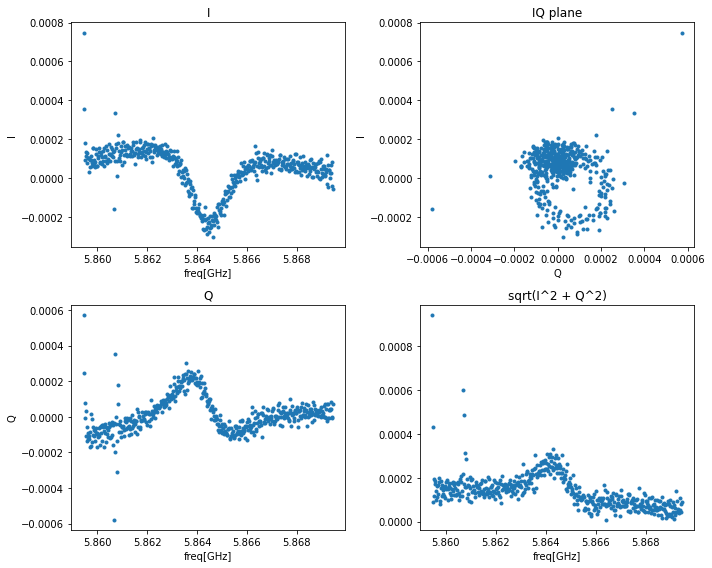

In [62]:
big_plot_from_array(np.gradient(np.array(I2)),np.gradient(np.array(Q2)), config['ref'][1], config['step'])#, begin=900, end=950)
length = check_length(I2, Q2)
x = np.linspace(config['ref'][1] - config['window']*config['step'], config['ref'][1] + (config['window'] - 1)*config['step'], config['window']*2)
der_IQ(x, I2, Q2, begin = 200, end = 300)

## edge acquisition

In [1]:
%load_ext autoreload
%autoreload 2

import h5py
import numpy as np
import matplotlib.pyplot as plt
from src.utils import *

In [65]:
path = '../data/raw/edge_acq/good/'
file_name = os.listdir(path)[28] #'acq_170522_230207'
file = path + file_name #+'.h5'
print(file_name)
import json
with open(path + 'config_' + file_name.replace('.h5', '.json'), 'r') as f:
    config = json.load(f)

#I1, Q1, I2, Q2 = get_hdf5_2(file)
with h5py.File(file, 'r') as hdf:
    Q1 = np.array(hdf['q_signal_ch0'])

acq_170522_210919.h5


In [66]:
print('For each channel %d wfm have been taken, each one of length %d.' %(len(Q1), len(Q1[0])))
print('The sample rate was %d Hz, corresponding to a dt of' %config['sample_rate'], 1/config['sample_rate'], 'seconds.')
print('The frequency set for the first resonator is',  config['freq'][0], 'GHz.')
print('The frequency set for the second resonator is', config['freq'][1], 'GHz.')

For each channel 10000 wfm have been taken, each one of length 6000.
The sample rate was 50000000 Hz, corresponding to a dt of 2e-08 seconds.
The frequency set for the first resonator is 5.86512 GHz.
The frequency set for the second resonator is 5.63622 GHz.


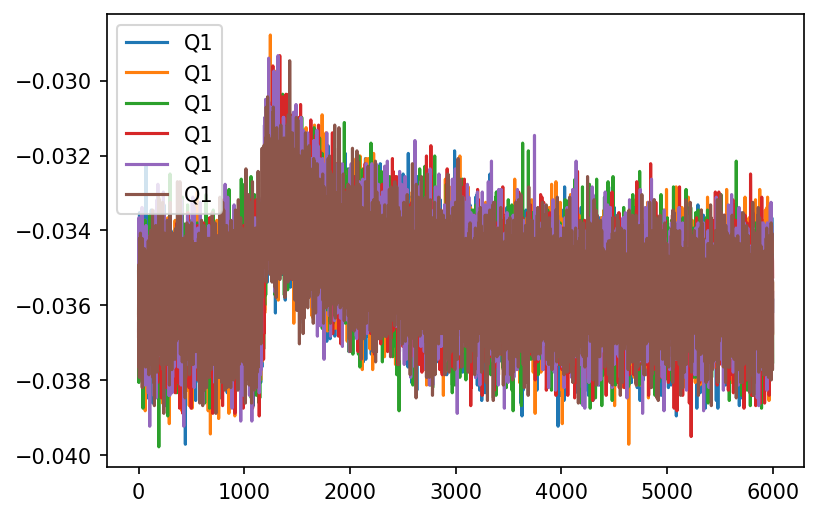

In [67]:
# plot some data
nn=2
plt.figure(dpi=150)
for nn in [10,20,30,40,50,6]:
    plt.plot(Q1[nn],'-', label='Q1')
#plt.xlim(1400,1600)
#plt.plot(I1[nn],'-', label='I1')
#plt.plot(Q2[nn],'-', label='Q2')
#plt.plot(I2[nn],'-', label='I2')
plt.legend()
plt.show()
#'o-'

## continuos acquisition

In [1]:
%load_ext autoreload
%autoreload 2

import h5py
import numpy as np
import matplotlib.pyplot as plt
from src.utils import *

In [129]:
import os
path = '../data/raw/cont_acq/'
print(os.listdir(path))

['config_cont_acq_170522_193308.json', 'config_cont_acq_170522_193634.json', 'config_cont_acq_170522_201626.json', 'config_cont_acq_170522_201853.json', 'config_cont_acq_170522_202023.json', 'config_cont_acq_170522_204209.json', 'config_cont_acq_170522_210452.json', 'cont_acq_170522_193308.h5', 'cont_acq_170522_193634.h5', 'cont_acq_170522_201626.h5', 'cont_acq_170522_201853.h5', 'cont_acq_170522_202023.h5', 'cont_acq_170522_204209.h5', 'cont_acq_170522_210452.h5']


In [2]:
path = '../data/raw/cont_acq/'
file_name = 'cont_acq_180522_020018'
file = path + file_name + '.h5'

import json
with open(path + 'config_' + file_name + '.json', 'r') as f:
    config = json.load(f)

I1, Q1, I2, Q2 = get_hdf5_2(file)

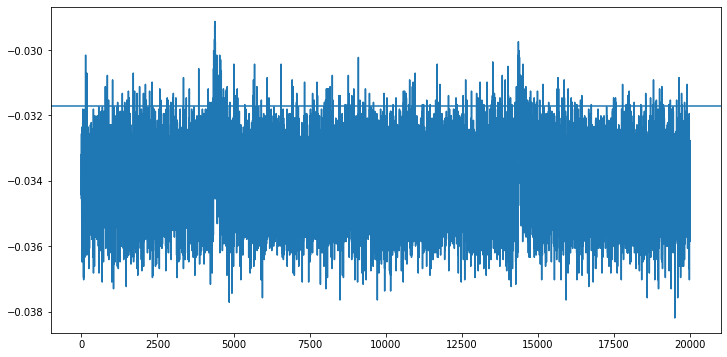

In [3]:
start =20000
y = Q1[start:start+20000]
plt.figure(figsize=(12,6))
plt.plot(y)
plt.axhline(-0.0317)
#plt.xlim(300,700)

The following piece of code should be adjusted every time, it's just to have an idea of the output of segmentation.py 

-0.0612 is deduced from the plot such that only one point for each signal is below it.

In [26]:
nsample = round(config['total_acq_time']/(1/config['sample_rate']*np.diff(np.nonzero(Q1[0][0:20000]<-0.0612)[0])[0]))
print('About %d signals have been acquired during this continuos acquisition.' %nsample)

About 70 signals have been acquired during this continuos acquisition.


## other plots

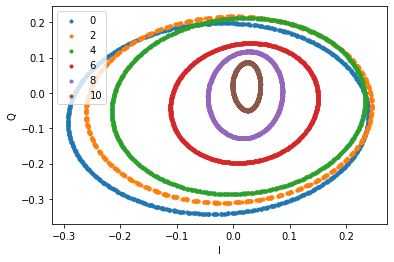

In [68]:
path = '../data/raw/mix_cal/mixer1/'
for i in [0,2,4,6,8,10]:
    file_name = 'mix_cal_' + str(i)
    file = path + file_name + '.h5'
    I, Q = get_hdf5(file)
    #big_plot_from_array(I, Q, config['ref'], config['step'])
    plt.scatter(I[0], Q[0], marker='.', label=str(i))
    plt.xlabel('I')
    plt.ylabel('Q')
plt.legend()
plt.savefig(path+'power.png', dpi=200, facecolor='white')

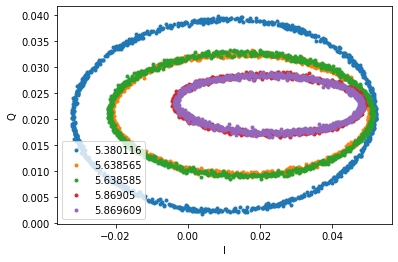

In [19]:
path = '../data/raw/mix_cal/mixer1/'
#[5.345679, 5.380116, 5.638565, 5.869609]
for i in [5.380116, 5.638565, 5.638585, 5.869050, 5.869609]:
    file_name = 'mix_cal_' + str(int(i*1e6))
    file = path + file_name + '.h5'
    I, Q = get_hdf5(file)
    #big_plot_from_array(I, Q, config['ref'], config['step'])
    plt.scatter(I[0], Q[0], marker='.', label=str(i))
    plt.xlabel('I')
    plt.ylabel('Q')
plt.legend()
plt.savefig(path+'frequency1_all.png', dpi=200, facecolor='white')

Text(0, 0.5, 'Q')

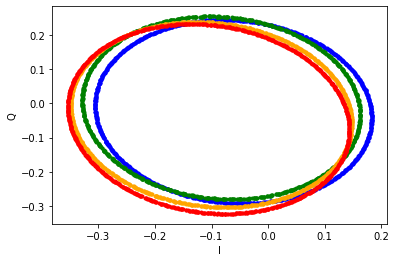

In [214]:
#I, Q = get_hdf5(file)
#big_plot_from_array(I, Q, config['ref'], config['step'])
plt.scatter(I1[0], Q1[0], marker='.', color='b')
plt.scatter(I2[0], Q2[0], marker='.', color='g')
plt.scatter(I3[0], Q3[0], marker='.', color='orange')
plt.scatter(I4[0], Q4[0], marker='.', color='r')
plt.xlabel('I')
plt.ylabel('Q')

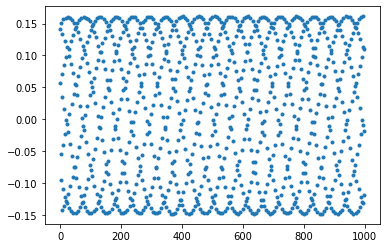

In [247]:
plt.scatter(np.linspace(0,len(Q[0])-1,len(Q[0])),Q[0], marker='.')

## Savgol filter

In [2]:
%load_ext autoreload
%autoreload 2

import h5py
import numpy as np
import matplotlib.pyplot as plt
from src.utils import *

In [42]:
#upload data
path  = '../data/raw/edge_acq/good/'
file = 'acq_060522_181916.h5'  #os.listdir(path)

#I1, Q1, t1, I2, Q2, t2 = get_hdf5_time(path + file)
with h5py.File(path + file, 'r') as hdf:
    Q1 = np.array(hdf['q_signal_ch0'])

In [15]:
np.array(Q1).shape

(6000, 1977)

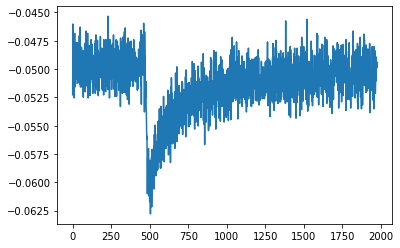

In [19]:
#plot one signal 
plt.plot(Q1[1])
#plt.xlim(400,500)

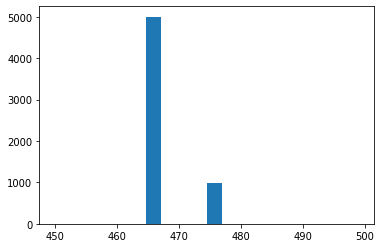

In [33]:
# apply the trigger and plot results 
# a histogram of the signals start indexes 
window_ma = 20
indexes = np.array(derivative_trigger_matrix(Q1, window_ma=window_ma, wl=60, poly=4, polarity=-1))
#indexes.sort()
plt.hist(indexes, bins = 20)
plt.show()
nn = np.argmin(np.array(indexes))
mm = np.argmax(np.array(indexes))

In [34]:
print('The signals with the two most different starts are %d and %d. The starts are %d and %d.' %(nn, mm, indexes[nn], indexes[mm]))

The signals with the two most different starts are 5384 and 5424. The starts are 450 and 499.


1188
1188


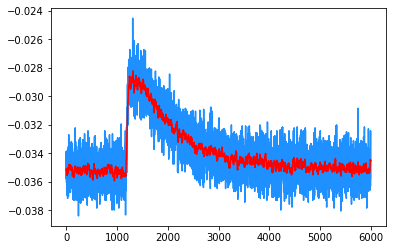

In [78]:
# if a signal has a strange behavior, check here what happened 
ii = 1 #mm
weights = np.full((1, window_ma), 1/window_ma)
moving_averages = convolve([Q1[ii]], weights, mode='mirror')

first_derivative = np.gradient(moving_averages[0])
std = np.std(first_derivative[0:100]) #100 will become a function of length and pos_ref in PXIe
index_min = first_derivative.argmax()
print(index_min)
rise_points = 0

while first_derivative[index_min - rise_points] < -std:
    rise_points += 1

print(index_min - rise_points)

plt.plot(Q1[ii], color = 'dodgerblue')
plt.plot(moving_averages[0], color='r')
#plt.xlim(1100,1250)
plt.show()

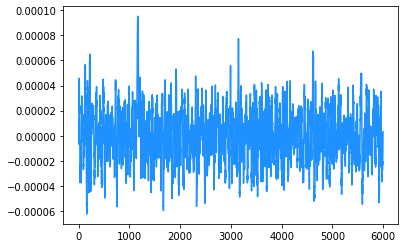

In [125]:
#plt.plot(Q1[ii], color='r')
plt.plot(savgol_filter(Q1[ii], window_length=60, polyorder=4, deriv=1, delta=1, mode='mirror'), color='dodgerblue')
#plt.xlim(950,1020)
plt.show()

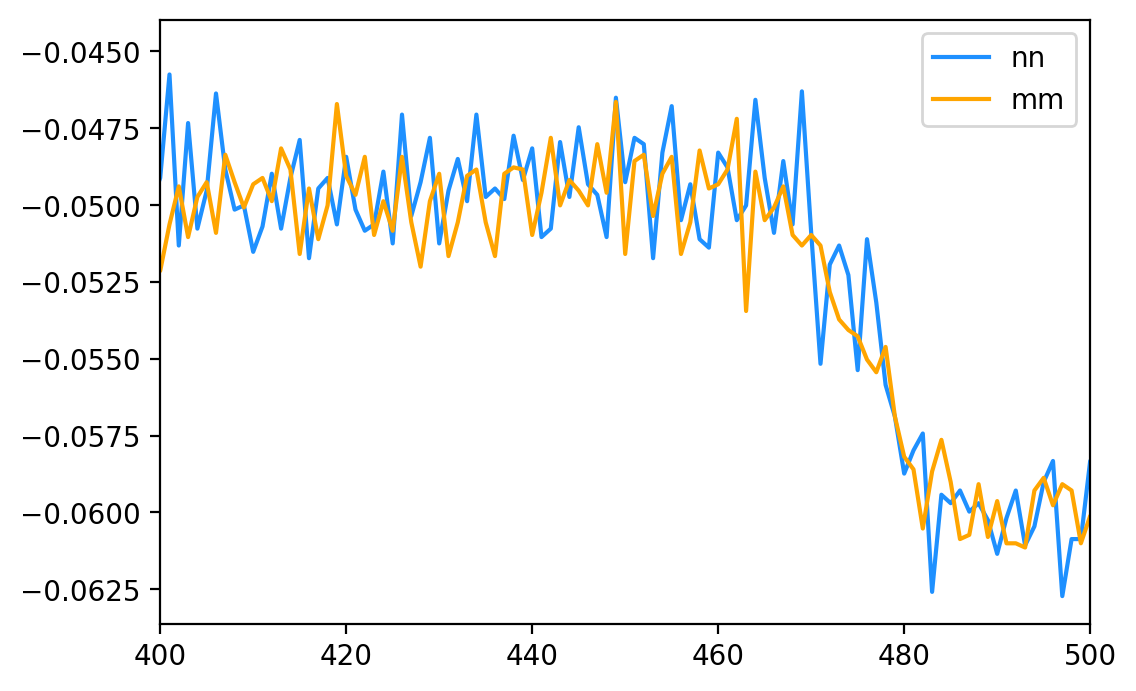

In [38]:
# plot the two most distant signals
plt.figure(dpi=200)
plt.plot(Q1[0], label = 'nn', color = 'dodgerblue')
plt.plot(Q1[10], label = 'mm', color = 'orange')
"""q=np.zeros(np.shape(Q1[0]))
for i in range(len(Q1)):
    q = q + Q1[i]
plt.plot(q/len(Q1))"""
plt.legend()
plt.xlim(400, 500)
plt.show()

In [30]:
# apply savgol to them 
delta = (indexes - indexes.min()).astype(int)
end = (indexes - indexes.max() - 1).astype(int)

new_Q1 = []

#np.where
for i in range(len(Q1)):
    new_Q1.append(Q1[i][delta[i]:end[i]])

(400.0, 500.0)

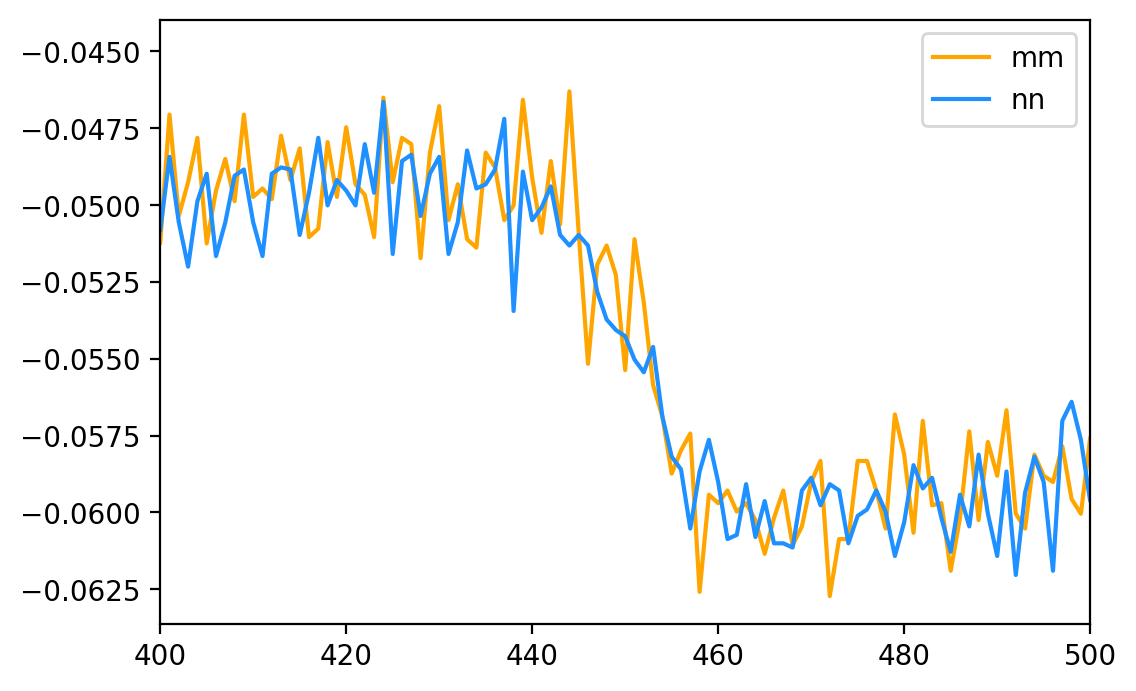

In [39]:
# plot them again and see the magic
plt.figure(dpi=200)
plt.plot(new_Q1[0], label = 'mm', color = 'orange')
plt.plot(new_Q1[10], label = 'nn', color = 'dodgerblue')
plt.legend()
plt.xlim(400,500)

In [147]:
# if happy with the results, save them. Here or with the dedicated script (savgol_filter.py)
#I1, Q1, t1, I2, Q2, t2 = get_hdf5_time(path + file)

# apply savgol filter and derivative trigger to align the wfms
indexes = np.array(derivative_trigger_matrix(Q1, window_ma=window_ma, wl=60, poly=4, polarity=1)) # choose whether to use I or Q for the savgol filter and choose parameters

#print(indexes)
# code to align the samples
# e.g. take the first entry as a reference and move the other
delta = (indexes - indexes.min()).astype(int)
end = (indexes - indexes.max() - 1).astype(int)

if (end[0]-delta[0])%2 != 0:
    end = end -1
    
print(len(I1[0][delta[0]:end[0]]))


# at the end it's necessary to cut the samples to have them all of the same length
# - 1 in end needed to avoid Q[i][sth:0] that happened when indexes=indexes.max()
# and returned an empty array
new_I1, new_Q1, new_I2, new_Q2 = [], [], [], []

#np.where
for i in range(len(I1)):
    new_I1.append(I1[i][delta[i]:end[i]])
    new_Q1.append(Q1[i][delta[i]:end[i]])
    new_I2.append(I2[i][delta[i]:end[i]])
    new_Q2.append(Q2[i][delta[i]:end[i]])

# use storage hdf5 from utils to store the new matrices
storage_hdf5(path + 'savgol_' + file, 'i_signal_ch0', new_I1, 'q_signal_ch0', new_Q1, 'timestamp_ch0', t1, 'i_signal_ch1', new_I2, 'q_signal_ch1', new_Q2, 'timestamp_ch1', t2)
print('Done :)')

5898
Done :)


In [148]:
path

'../data/raw/edge_acq/'

## join signal and noise

In [161]:
path  = '../data/clean/segm_acq/' #'../data/raw/edge_acq/'
file = 'segm_acq_060522_183654.h5' #os.listdir(path)

I1, Q1, t1, I2, Q2, t2 = get_hdf5_time(path + file)

path2  = '../data/raw/edge_acq/'
file2 = 'noise_060522_183913.h5' #os.listdir(path)

NI1, NQ1, Nt1, NI2, NQ2, Nt2 = get_hdf5_time(path2 + file2)

In [164]:
np.array(NI1[:,:len(I1[0])]).shape

(1000, 2000)

In [165]:
a = np.concatenate((np.array(I1), np.array(NI1[:,:len(I1[0])])), axis=0)
b = np.concatenate((np.array(Q1), np.array(NQ1[:,:len(I1[0])])), axis=0)
c = np.concatenate((np.array(I2), np.array(NI2[:,:len(I1[0])])), axis=0)
d = np.concatenate((np.array(Q2), np.array(NQ2[:,:len(I1[0])])), axis=0)
t = np.linspace(0, len(a)-1, len(a))
t.shape
#t1 = np.concatenate((np.array(t1), np.array(Nt1)), axis=0)
#t2 = np.concatenate((np.array(t2), np.array(Nt2)), axis=0)
#t1.shape

(1070,)

In [166]:
path_save = '../data/clean/total/'
storage_hdf5(path_save + 'tot_' + file, 'i_matrix_ch0', a, 'q_matrix_ch0', b, 'i_matrix_ch1', c, 'q_matrix_ch1', d, 'timestamp_ch0', t1, 'timestamp_ch1', t2)